In [1]:
from pandas import read_csv
import pandas as pd
from sklearn.model_selection import train_test_split

In [28]:
data=read_csv("heart_disease.csv",header=None)
data = data.apply(pd.to_numeric, errors='coerce')

data = data.dropna()

dataset=data.values

X=dataset[:,:-1]
y=dataset[:,-1]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print('Train',X_train.shape,y_train.shape)
print('Test',X_test.shape,y_test.shape)

Train (216, 13) (216,)
Test (54, 13) (54,)


In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [30]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

NBclassif=GaussianNB()

bins = np.linspace(min(y_train), max(y_train), num=6)
y_train_binned = np.digitize(y_train, bins)

NBclassif.fit(X_train, y_train_binned)

GaussianNB()

In [31]:
ypred=NBclassif.predict(X_test)
ypred

array([1, 6, 1, 6, 6, 6, 6, 6, 1, 6, 6, 6, 6, 1, 1, 6, 1, 6, 6, 1, 6, 1,
       1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 6, 1, 1, 6, 1,
       1, 6, 1, 6, 1, 6, 1, 6, 1, 1], dtype=int64)

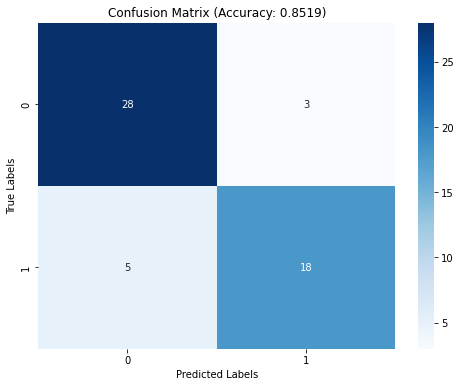

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, ypred)
acc = accuracy_score(y_test, ypred)

# Create a heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix (Accuracy: {acc:.4f})')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [49]:
print(cm)

[[28  3]
 [ 5 18]]


In [34]:
acc

0.07407407407407407

In [61]:
from sklearn.metrics import classification_report

classy_rep = classification_report(y_test, ypred, zero_division=1)
print(classy_rep)

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88        31
         1.0       0.86      0.78      0.82        23

    accuracy                           0.85        54
   macro avg       0.85      0.84      0.85        54
weighted avg       0.85      0.85      0.85        54



In [36]:
# HYPERTUNING PARAMS

In [37]:
import numpy as np

In [38]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=15,random_state=1)

In [39]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV

grid_param={'var_smoothing':np.logspace(0,-10,500)}
grid_NB=GridSearchCV(estimator=NBclassif, param_grid=grid_param, cv=cv, verbose=1, scoring='accuracy')

data_trans=PowerTransformer().fit_transform(X_test)
grid_NB.fit(data_trans,y_test)

Fitting 75 folds for each of 500 candidates, totalling 37500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=15, n_splits=5, random_state=1),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 9.54904456e-01, 9.11842520e-01, 8.70722485e-01,
       8.31456781e-01, 7.93961785e-01, 7.58157646e-01, 7.23968114e-01,
       6.91320378e-01, 6.60144909e-01, 6.30375315e-01, 6.01948197e-01,
       5.74803016e-01, 5.48881961e-01, 5....
       2.89015972e-10, 2.75982639e-10, 2.63537052e-10, 2.51652705e-10,
       2.40304289e-10, 2.29467637e-10, 2.19119669e-10, 2.09238348e-10,
       1.99802631e-10, 1.90792422e-10, 1.82188534e-10, 1.73972643e-10,
       1.66127252e-10, 1.58635653e-10, 1.51481892e-10, 1.44650734e-10,
       1.38127630e-10, 1.31898690e-10, 1.25950646e-10, 1.20270833e-10,
       1.14847155e-10, 1.09668060e-10, 1.04722519e-10, 1.00000000e-10])},
             scoring='accuracy', verbose=1)

In [40]:
grid_NB.best_score_

0.8080000000000002

In [41]:
grid_NB.best_params_

{'var_smoothing': 0.114318425012915}

In [42]:
ypred=grid_NB.predict(X_test)

In [43]:
cm=confusion_matrix(y_test,ypred)
acc=accuracy_score(y_test,ypred)

In [44]:
cm

array([[28,  3],
       [ 5, 18]], dtype=int64)

In [45]:
acc

0.8518518518518519

In [46]:
cr=classification_report(y_test,ypred)
cr

'              precision    recall  f1-score   support\n\n         0.0       0.85      0.90      0.88        31\n         1.0       0.86      0.78      0.82        23\n\n    accuracy                           0.85        54\n   macro avg       0.85      0.84      0.85        54\nweighted avg       0.85      0.85      0.85        54\n'

In [47]:
print(cr)

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88        31
         1.0       0.86      0.78      0.82        23

    accuracy                           0.85        54
   macro avg       0.85      0.84      0.85        54
weighted avg       0.85      0.85      0.85        54

